# Predicting with NN

In [1]:
from scipy.special import expit
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

from sklearn import svm
import pandas as pd
import numpy as np
import sklearn

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_theme(palette='colorblind')

<AxesSubplot: >

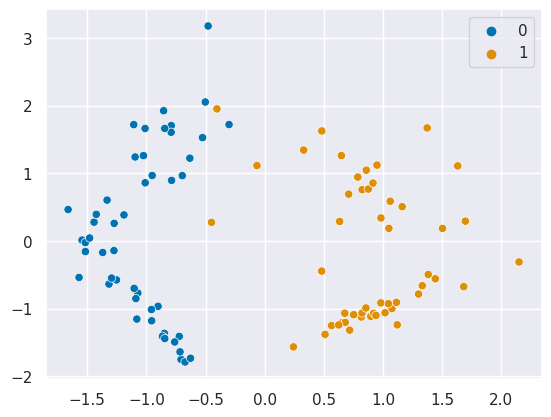

In [2]:
X, y = make_classification(n_samples=100, random_state=1,n_features=2,n_redundant=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y,
             random_state=1)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [3]:
clf = MLPClassifier(
 hidden_layer_sizes=(1), # 1 hidden layer, 1 aritficial neuron
 max_iter=100, # maximum 100 interations in optimization
 alpha=1e-4, # regularization
 solver="lbfgs", #optimization algorithm  
 verbose=10, # how much detail to print
 activation= 'identity' # how to transform the hidden layer beofore passing it to the next layer
)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49026D-01    |proj g|=  3.44085D-01

At iterate    1    f=  5.61527D-01    |proj g|=  2.17973D-01

At iterate    2    f=  2.23455D-01    |proj g|=  2.48238D-01

At iterate    3    f=  1.35028D-01    |proj g|=  1.56897D-01

At iterate    4    f=  5.87469D-02    |proj g|=  3.54584D-02

At iterate    5    f=  5.46840D-02    |proj g|=  1.70278D-02

At iterate    6    f=  5.16642D-02    |proj g|=  1.69448D-02

At iterate    7    f=  4.93204D-02    |proj g|=  9.51965D-03

At iterate    8    f=  4.89048D-02    |proj g|=  2.27246D-03

At iterate    9    f=  4.88100D-02    |proj g|=  2.48116D-03

At iterate   10    f=  4.87317D-02    |proj g|=  4.07073D-03

At iterate   11    f=  4.83841D-02    |proj g|=  7.89417D-03

At iterate   12    f=  4.80705D-02    |proj g|=  7.04623D-03

At iterate   13    f=  4.7

 This problem is unconstrained.


1.0

In [4]:
clf.activation

'identity'

In [5]:
clf.out_activation_

'logistic'

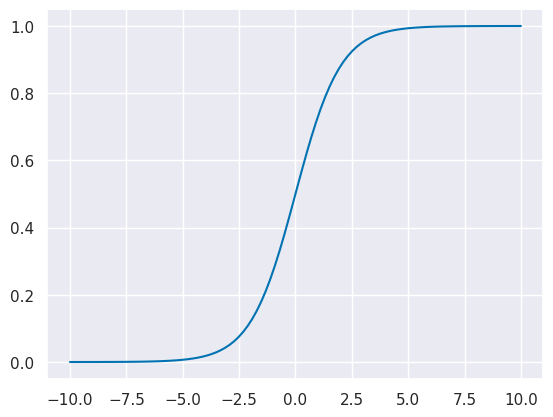

In [6]:
x_logistic = np.linspace(-10,10,100)
y_logistic = expit(x_logistic)
plt.plot(x_logistic,y_logistic)

In [7]:
clf.coefs_

[array([[-5.09240727],
        [ 0.14657141]]),
 array([[-2.57999695]])]

In [8]:
clf.intercepts_

[array([-1.28067162]), array([2.38983359])]

In [9]:
pt = np.array([[-1,2]])

In [10]:
expit((np.matmul(pt,clf.coefs_[0]) + clf.intercepts_[0])*clf.coefs_[1] + clf.intercepts_[1])

array([[0.00027438]])

In [11]:
clf.predict_proba(pt)

array([[9.99725625e-01, 2.74375013e-04]])

In [12]:
def aritificial_neuron_template(activation,weights,bias,inputs):
    '''
    simple artificial neuron

    Parameters
    ----------
    activation : function
    activation function of the neuron
    weights : numpy aray
    wights for summing inputs one per input
    bias: numpy array
    bias term added to the weighted sum
    inputs : numpy array
    input to the neuron, must be same size as weights

    '''
    return activation(np.matmul(inputs,weights) +bias)

# two common activation functions
identity_activation = lambda x: x
logistic_activation = lambda x: expit(x)

In [13]:
hidden_neuron = lambda x: aritificial_neuron_template(identity_activation,clf.coefs_[0],clf.intercepts_[0],x)
output_neuron = lambda h: aritificial_neuron_template(expit,clf.coefs_[1],clf.intercepts_[1],h)

output_neuron(hidden_neuron(pt))

array([[0.00027438]])

In [14]:
X, y = make_classification(n_samples=200, random_state=1,n_features=4,n_redundant=0,n_informative=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                          random_state=5)
pt_4d =np.asarray([[-1,-2,2,-1],[1.5,0,.5,1]])
clf_4d = MLPClassifier(
  hidden_layer_sizes=(1),
  max_iter=5000,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  activation= 'identity'
)

clf_4d.fit(X_train, y_train)


clf_4d.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09992D+00    |proj g|=  4.72148D-01

At iterate    1    f=  7.07077D-01    |proj g|=  1.62252D-01

At iterate    2    f=  6.56854D-01    |proj g|=  1.29450D-01

At iterate    3    f=  5.35261D-01    |proj g|=  1.39745D-01

At iterate    4    f=  4.55790D-01    |proj g|=  9.59028D-02

At iterate    5    f=  4.42499D-01    |proj g|=  4.61647D-02

At iterate    6    f=  4.35963D-01    |proj g|=  1.22149D-02

At iterate    7    f=  4.34971D-01    |proj g|=  1.02479D-02

At iterate    8    f=  4.34672D-01    |proj g|=  2.89817D-03

At iterate    9    f=  4.34656D-01    |proj g|=  9.79952D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


0.84

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

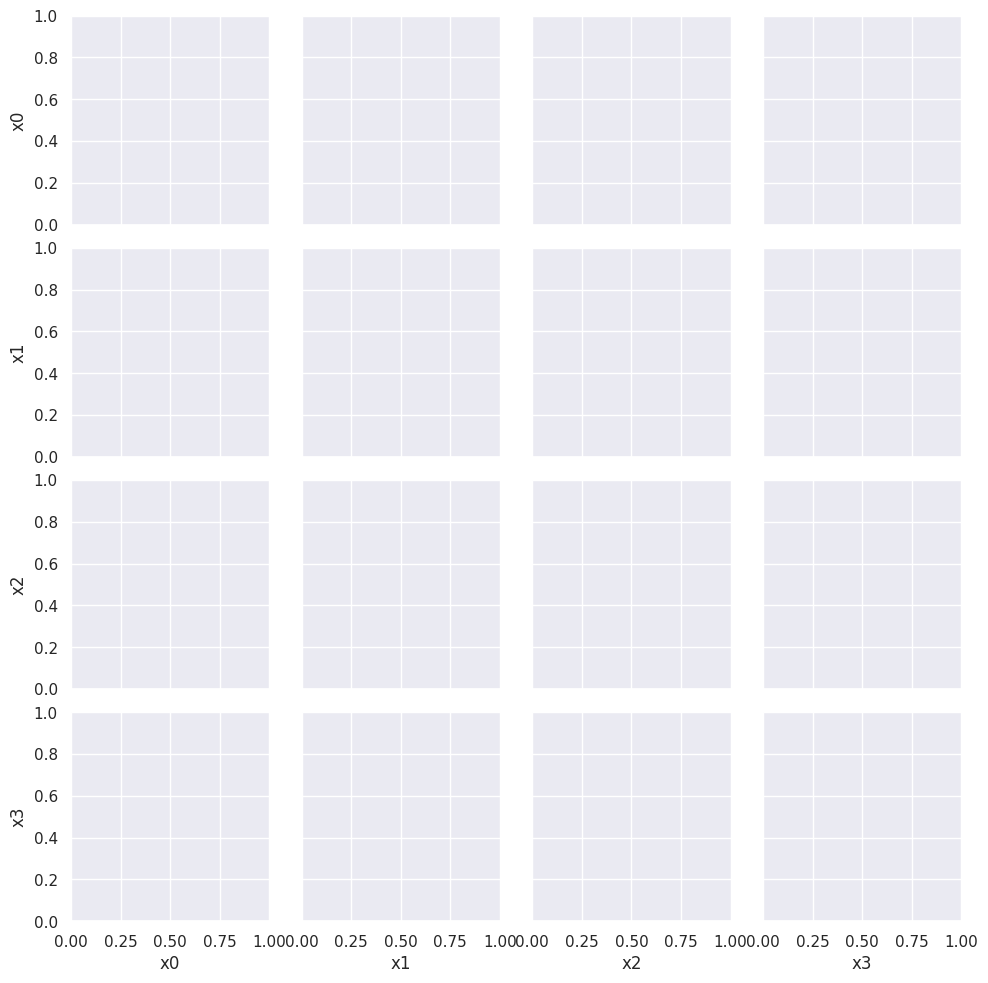

In [15]:
df = pd.DataFrame(X,columns=['x0','x1','x2','x3'])
df['y'] = y
sns.pairplot(df,hue='y')

In [16]:
hidden_neuron_4d = lambda x: aritificial_neuron_template(identity_activation,
                             clf_4d.coefs_[0],clf_4d.intercepts_[0],x)
output_neuron_4d = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d.coefs_[1],clf_4d.intercepts_[1],x)


output_neuron_4d(hidden_neuron_4d(pt_4d))

array([[0.95368234],
       [0.85341629]])

In [17]:
clf_4d.predict_proba(pt_4d)

array([[0.04631766, 0.95368234],
       [0.14658371, 0.85341629]])

In [18]:
clf_4d_4h = MLPClassifier(
  hidden_layer_sizes=(4),
  max_iter=500,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  activation='logistic'
)

clf_4d_4h.fit(X_train, y_train)


clf_4d_4h.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20888D-01    |proj g|=  1.14613D-01

At iterate    1    f=  6.98452D-01    |proj g|=  1.70132D-01

At iterate    2    f=  6.41600D-01    |proj g|=  5.27035D-02

At iterate    3    f=  6.11212D-01    |proj g|=  3.83964D-02

At iterate    4    f=  5.33058D-01    |proj g|=  6.24294D-02

At iterate    5    f=  4.89226D-01    |proj g|=  3.18379D-02

At iterate    6    f=  4.42492D-01    |proj g|=  4.31905D-02

At iterate    7    f=  4.17392D-01    |proj g|=  4.84905D-02

At iterate    8    f=  3.67460D-01    |proj g|=  5.52345D-02

At iterate    9    f=  3.14579D-01    |proj g|=  3.25247D-02

At iterate   10    f=  2.52326D-01    |proj g|=  2.24289D-02

At iterate   11    f=  2.11570D-01    |proj g|=  1.57131D-02

At iterate   12    f=  1.81655D-01    |proj g|=  4.10451D-02

At iterate   13    f=  1.5

 This problem is unconstrained.


0.92

In [19]:
hidden_neuron_4d_h0 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,0],clf_4d_4h.intercepts_[0][0],x)
hidden_neuron_4d_h1 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,1],clf_4d_4h.intercepts_[0][1],x)
hidden_neuron_4d_h2 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,2],clf_4d_4h.intercepts_[0][2],x)
hidden_neuron_4d_h3 = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[0][:,3],clf_4d_4h.intercepts_[0][3],x)
output_neuron_4d_4h = lambda x: aritificial_neuron_template(logistic_activation,
                             clf_4d_4h.coefs_[1],clf_4d_4h.intercepts_[1],x)

In [20]:
output_neuron_4d_4h(np.asarray([hidden_neuron_4d_h0(pt_4d),
         hidden_neuron_4d_h1(pt_4d),
         hidden_neuron_4d_h2(pt_4d),
         hidden_neuron_4d_h3(pt_4d)]).T)

array([[0.9999897 ],
       [0.99999976]])

In [21]:
clf_4d_4h.predict_proba(pt_4d)

array([[1.03043359e-05, 9.99989696e-01],
       [2.41212960e-07, 9.99999759e-01]])

## Questions

### Are there neural networks wherein each layer does a different type of transformation, such as logistic or identity?

There are different types of layers and some are defined by activations, others are more complex calculations in other ways.

### In the case of neural networks with multiple output neurons how do they handle multiple output neurons being 1